# Exploratory Data Analysis - US Accident dataset

**Description**:
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset. Check here to learn more about this dataset.

**Content**
This dataset has been collected in real-time, using multiple Traffic APIs. Currently, it contains accident data that are collected from February 2016 to Dec 2021 for the Contiguous United States. Check here to learn more about this dataset.

In [50]:
# import all necesary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [51]:
# read & load the dataset into pandas dataframe
df = pd.read_csv('US_Accidents_Dec21_updated.csv')

In [52]:
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


In [53]:
df.tail(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845341,A-2845342,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [54]:
# check the no. of columns & rows
print(f"This dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

This dataset contains 2845342 rows and 47 columns


### Profile of the data 

In [55]:
# Basic information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [12]:
# Display statistical analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


In [11]:
df.describe(include='object').T

,count,unique,top,freq
ID,2845342,2845342,A-1,1
Start_Time,2845342,1959333,2021-01-26 16:16:13,214
End_Time,2845342,2351505,2021-11-22 08:00:00,88
Description,2845342,1174563,A crash has occurred causing no to minimum del...,7978
Street,2845340,159651,I-95 N,39853
Side,2845342,3,R,2353309
City,2845205,11681,Miami,106966
County,2845342,1707,Los Angeles,234122
State,2845342,49,CA,795868
Zipcode,2844023,363085,91761,6162


In [13]:
# Duplicate value check!
df.duplicated().sum()

0

In [20]:
# Null values
pd.DataFrame({"Missing_values":df.isnull().sum().sort_values(ascending=False).values,
             "Percentage":(df.isnull().sum().sort_values(ascending=False)/len(df))*100})

,Missing_values,Percentage
Number,1743911,61.290031
Precipitation(in),549458,19.310789
Wind_Chill(F),469643,16.505678
Wind_Speed(mph),157944,5.550967
Wind_Direction,73775,2.592834
Humidity(%),73092,2.568830
Weather_Condition,70636,2.482514
Visibility(mi),70546,2.479350
Temperature(F),69274,2.434646
Pressure(in),59200,2.080593


Text(0, 0.5, 'Columns')

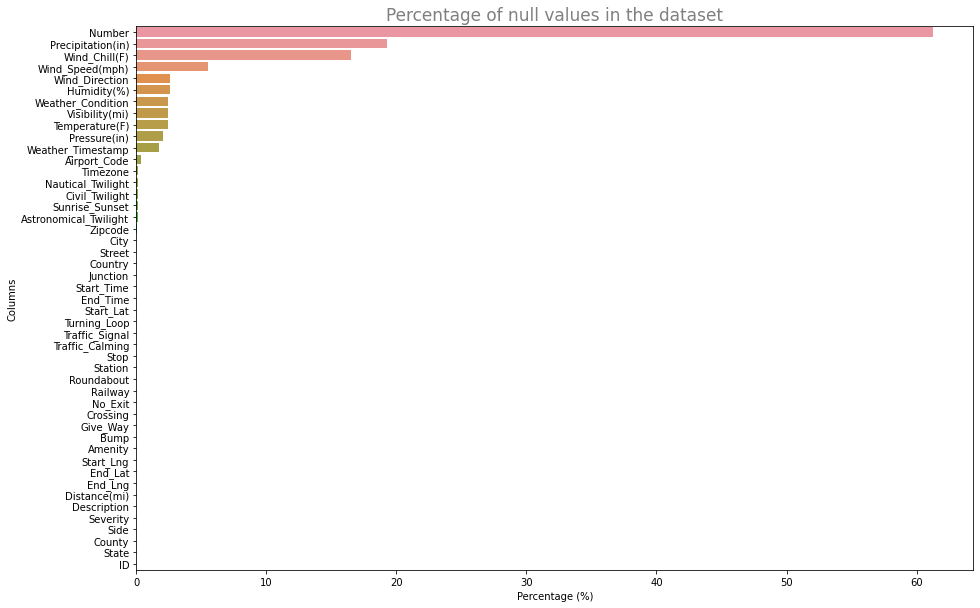

In [22]:
# Visualizing missing values using barplot

plt.figure(figsize=(15,10))
sns.barplot(y=((df.isnull().sum().sort_values(ascending=False)/len(df))*100).index, x=(df.isnull().sum().sort_values(ascending=False)/len(df))*100)
plt.title("Percentage of null values in the dataset",size=17,color="grey")
plt.xlabel('Percentage (%)')
plt.ylabel('Columns')

### City wise analysis 

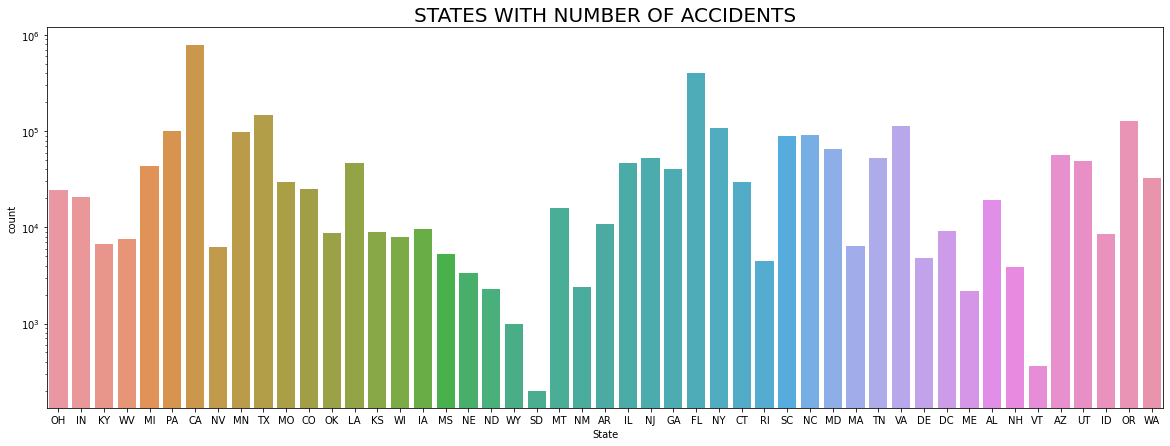

In [6]:
plt.figure(figsize=(20,7))
sns.countplot(x="State",data=df)
plt.yscale("log")
plt.title("STATES WITH NUMBER OF ACCIDENTS",fontsize=20)
plt.show()

In [28]:
# Number of unique cities in dataset.
df['City'].nunique()

11681

There are total 11681 cities.

In [18]:
# create a dataframe of city and their corresponding accident cases
city = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [19]:
# Top 10 city in US which has the most number of accident cases
city.head(10)

,City,Cases
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448
5,Charlotte,33152
6,Sacramento,32559
7,San Diego,26627
8,Raleigh,22840
9,Minneapolis,22768


In [71]:
city.tail(10)

,City,Cases
11671,Linn,1
11672,Stella,1
11673,York New Salem,1
11674,Algona,1
11675,Phil Campbell,1
11676,Ridgedale,1
11677,Sekiu,1
11678,Wooldridge,1
11679,Bullock,1
11680,American Fork-Pleasant Grove,1


In [20]:
import plotly.express as px

fig = px.scatter_geo(city, locations="City", color="Cases",
                     hover_name="City", size="Cases",
                     projection="natural earth")
fig.show()

Text(0, 0.5, 'No. of cases')

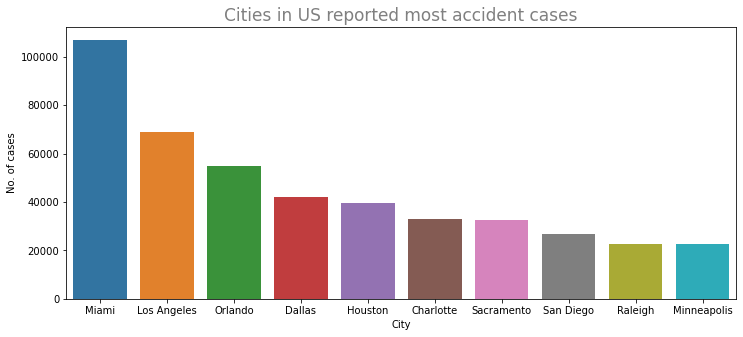

In [55]:
# Visualizing top 10 city in US which has the most number of accident cases

plt.figure(figsize=(12,5))
sns.barplot(y=city['Cases'].head(10), x=city['City'].head(10))
plt.title("Cities in US reported most accident cases",size=17,color="grey")
plt.xlabel('City')
plt.ylabel('No. of cases')

In [ ]:
import plotly.express as px

fig = px.scatter_geo(city, locations="City", color="City",
                     hover_name="City", size="Cases",
                     projection="natural earth")
fig.show()

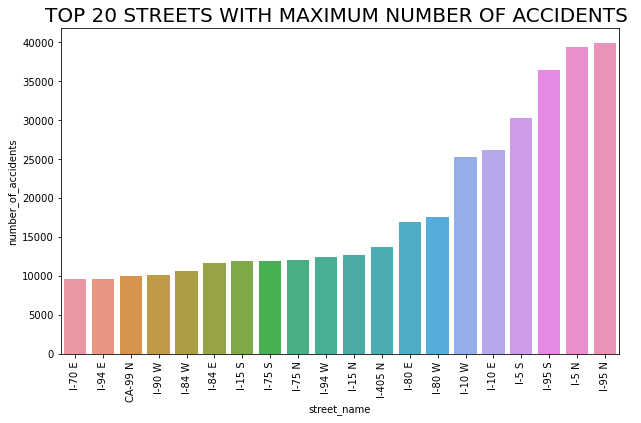

In [8]:
top_streets=df["Street"].value_counts().sort_values()[-20:].reset_index()
top_streets.columns=["street_name","number_of_accidents"]

plt.figure(figsize=(10,6))
sns.barplot(x=top_streets["street_name"],y=top_streets["number_of_accidents"])
plt.xticks(rotation=90)
plt.title("TOP 20 STREETS WITH MAXIMUM NUMBER OF ACCIDENTS ",fontsize=20)
plt.show()

In [57]:
city_by_accident = df['City'].value_counts()
print(f"There are total {len(city[city['Cases'] >= 1000])} cities where more than 1000 accident cases were reproted.")
print(f"There are total {len(city[city['Cases'] < 1000])} cities where less than 1000 accident cases were reproted.")

There are total 496 cities where more than 1000 accident cases were reproted.
There are total 11185 cities where less than 1000 accident cases were reproted.


In [58]:
def city_cases_percentage(val, operator):
    if operator == '<':
        res = city_df[city_df['Cases']<val].shape[0]
    elif operator == '>':
        res = city_df[city_df['Cases']>val].shape[0]
    elif operator == '=':
        res = city_df[city_df['Cases']==val].shape[0]
    print(f'{res} Cities, {round(res*100/city_df.shape[0], 2)}%')
    
    
city_cases_percentage(1, '=')
city_cases_percentage(100, '<')
city_cases_percentage(1000, '<')
city_cases_percentage(1000, '>')
city_cases_percentage(5000, '>')
city_cases_percentage(10000, '>')

1110 Cities, 9.5%
8727 Cities, 74.71%
11185 Cities, 95.75%
494 Cities, 4.23%
71 Cities, 0.61%
34 Cities, 0.29%


In this Dataset, we have the records of total 11681 Cities.
- 9.5% (1110 Cities) cities in US, have only 1 accident record present.
- Around 74.71% (8,727 Cities) have less than 100 total no. of road accidents.
- 95.75% (11,185 Cities) cities in US, have the road accident records (2016-2020), less than 1,000.
- There are 494 Cities (4.23%) in US, which have more than 1,000 total no. of road accidents in past 5 years.
- 71 Cities (0.61%) in US, have more than 5,000 road accident records.
- 34 Cities (0.29%) in US, have more than 10,000 road accident records.

In [69]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [70]:
weekday_max_acc=df.Start_Time.dt.day_name().value_counts()
weekday_max_acc

Friday       492074
Thursday     463477
Wednesday    455037
Tuesday      443968
Monday       419821
Saturday     311691
Sunday       259274
Name: Start_Time, dtype: int64

Text(0, 0.5, 'No. of accidents')

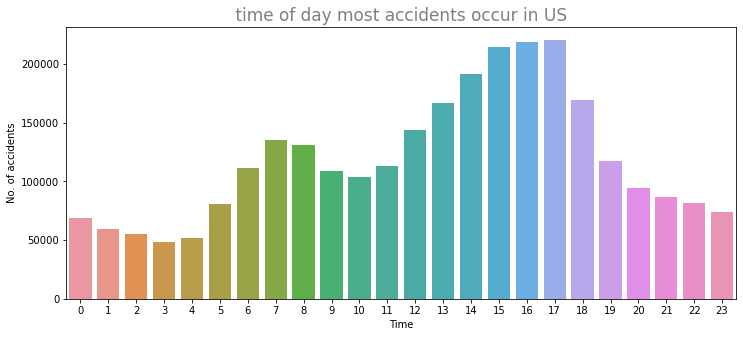

In [68]:
# extract the timestamp column to hours

time_max_acc =df.Start_Time.dt.hour.value_counts()

plt.figure(figsize=(12,5))
sns.barplot(y=time_max_acc, x=time_max_acc.index)
plt.title(" time of day most accidents occur in US ",size=17,color="grey")
plt.xlabel('Time')
plt.ylabel('No. of accidents')

- Most accident occurs between 2:00PM - 6:00PM
- Most-deadliest accident hour is 5:00PM
- Next highest accident occur between 6:00AM - 8:00AM

Text(0, 0.5, 'No. of accidents')

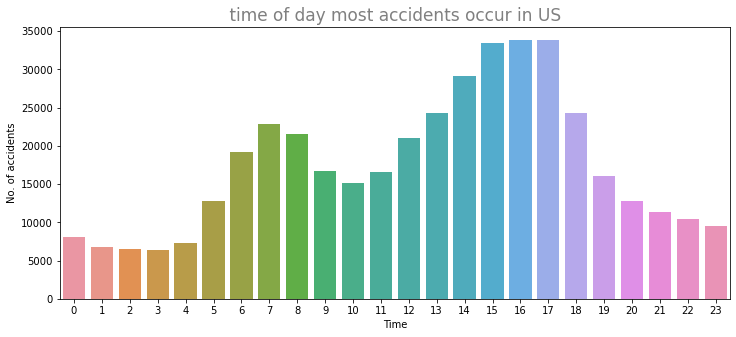

In [93]:
# extract the timestamp column to hours
monday_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 0]
monday_time_max_acc = monday_start_time .dt.hour.value_counts()

plt.figure(figsize=(12,5))
sns.barplot(y=monday_time_max_acc, x=monday_time_max_acc.index)
plt.title(" time of day most accidents occur in US ",size=17,color="grey")
plt.xlabel('Time')
plt.ylabel('No. of accidents')

Text(0, 0.5, 'No. of accidents')

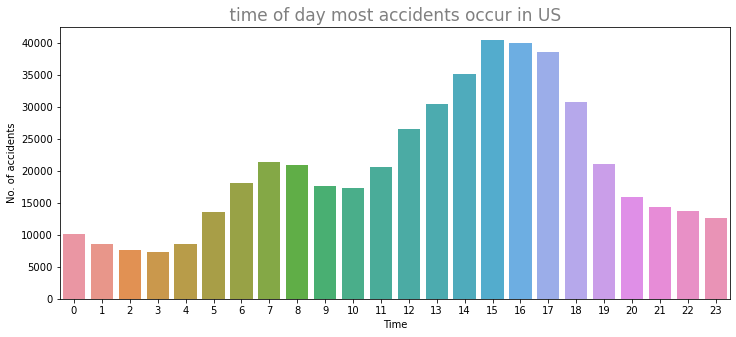

In [94]:
# extract the timestamp column to hours
friday_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 4]
friday_time_max_acc = friday_start_time.dt.hour.value_counts()

plt.figure(figsize=(12,5))
sns.barplot(y=friday_time_max_acc, x=friday_time_max_acc.index)
plt.title(" time of day most accidents occur in US ",size=17,color="grey")
plt.xlabel('Time')
plt.ylabel('No. of accidents')

Text(0, 0.5, 'No. of accidents')

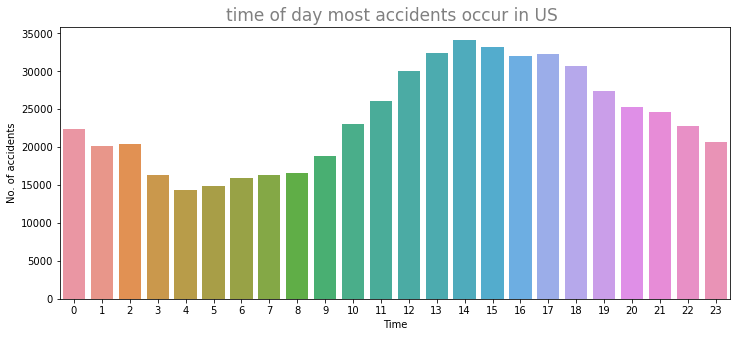

In [95]:
# extract the timestamp column to hours
weekend_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek > 4]
weekend_time_max_acc = weekend_start_time.dt.hour.value_counts()

plt.figure(figsize=(12,5))
sns.barplot(y=weekend_time_max_acc, x=weekend_time_max_acc.index)
plt.title("time of day most accidents occur in US ",size=17,color="grey")
plt.xlabel('Time')
plt.ylabel('No. of accidents')

Text(0, 0.5, 'No. of accidents')

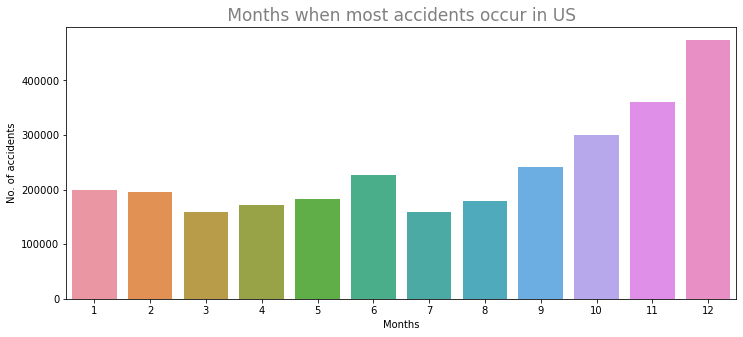

In [92]:
# extract the timestamp column to hours
month_max_acc =df.Start_Time.dt.month.value_counts()

plt.figure(figsize=(12,5))
sns.barplot(y=month_max_acc, x=month_max_acc.index)
plt.title(" Months when most accidents occur in US ",size=17,color="grey")
plt.xlabel('Months')
plt.ylabel('No. of accidents')

In [91]:
month_max_acc=df['Start_Time'].dt.month_name().value_counts()
month_max_acc

December     473943
November     360696
October      299131
September    241822
June         226561
January      198365
February     194995
May          181944
August       178670
April        171880
July         159111
March        158224
Name: Start_Time, dtype: int64

Text(0, 0.5, 'No. of accidents')

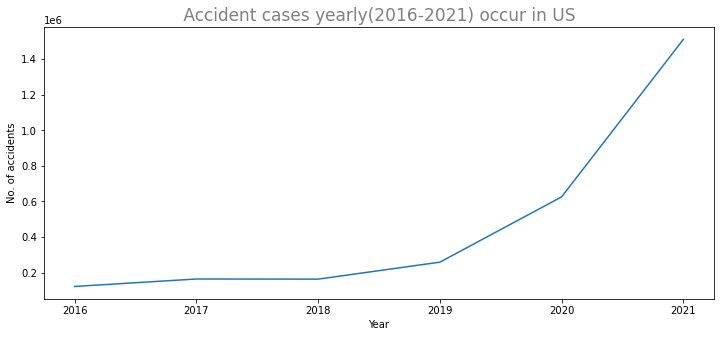

In [96]:
year_max_acc = df['Start_Time'].dt.year.value_counts()

plt.figure(figsize=(12,5))
sns.lineplot(data=year_max_acc)
plt.title(" Accident cases yearly(2016-2021) occur in US ",size=17,color="grey")
plt.xlabel('Year')
plt.ylabel('No. of accidents')

In [56]:
range_temp = pd.cut(df['Temperature(F)'], 5)
range_temp.unique()

[(25.0, 82.0], (-32.0, 25.0], NaN, (82.0, 139.0], (139.0, 196.0], (-89.285, -32.0]]
Categories (5, interval[float64, right]): [(-89.285, -32.0] < (-32.0, 25.0] < (25.0, 82.0] < (82.0, 139.0] < (139.0, 196.0]]

In [57]:
df["Temperature(F)"].value_counts()

 73.0     64505
 77.0     63575
 75.0     60534
 72.0     59681
 68.0     58557
          ...  
 109.8        1
-9.8          1
 170.6        1
 107.2        1
 99.1         1
Name: Temperature(F), Length: 788, dtype: int64

In [58]:
df.loc[ (df['Temperature(F)'] <= 10), 'Temperature(F)']=1
df.loc[ (df['Temperature(F)'] > 10) & (df['Temperature(F)'] <= 50), 'Temperature(F)']=2
df.loc[ (df['Temperature(F)'] > 50) & (df['Temperature(F)'] <= 90), 'Temperature(F)']=3
df.loc[ (df['Temperature(F)'] > 90) & (df['Temperature(F)'] <= 130),'Temperature(F)' ]=4
df.loc[  df['Temperature(F)'] > 130, 'Temperature(F)']=5

In [59]:
weather_dist = df['Temperature(F)'].value_counts().reset_index()
weather_dist.columns=["range_temp","number_of_accidents"]
weather_dist

,range_temp,number_of_accidents
0,3.0,1947266
1,2.0,716788
2,4.0,90628
3,1.0,21378
4,5.0,8


In [60]:
weather_dist.range_temp=weather_dist.range_temp.map({1.0:"below 10 degree F",
                            2.0:"from 10 to 50 degree F",
                            3.0:"from 50 to 90 degree F",
                            4.0:"from 90 to 130 degree F",
                             5.0:"above 130 degree F"})

In [61]:
df.loc[(df["Humidity(%)"]<=20),"Humidity(%)"]=1
df.loc[(df["Humidity(%)"]>20) & (df["Humidity(%)"]<=40),"Humidity(%)"]=2
df.loc[(df["Humidity(%)"]>40) & (df["Humidity(%)"]<=60),"Humidity(%)"]=3
df.loc[(df["Humidity(%)"]>60) & (df["Humidity(%)"]<=80),"Humidity(%)"]=4
df.loc[(df["Humidity(%)"]>80) & (df["Humidity(%)"]<=100),"Humidity(%)"]=5
df.loc[(df["Humidity(%)"]>100),"Humidity(%)"]=6

In [62]:
df["Humidity(%)"].unique()

array([ 3.,  5.,  4., nan,  2.,  1.])

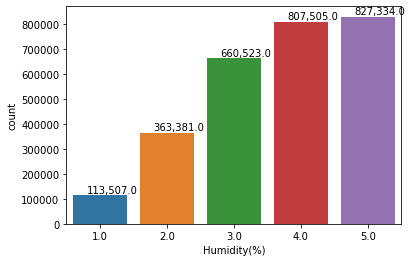

In [63]:
ax=sns.countplot(df["Humidity(%)"])
for i in ax.patches:
    count = '{:,.1f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

In [64]:
px.bar(x=weather_dist["range_temp"],y=weather_dist["number_of_accidents"])

In [65]:
df[["Weather_Condition","Severity"]].value_counts().sort_values()[-10:]

Weather_Condition  Severity
Haze               2             34135
Light Snow         2             38044
Fog                2             38575
Overcast           2             55514
Light Rain         2            112504
Clear              2            118638
Partly Cloudy      2            221358
Mostly Cloudy      2            319525
Cloudy             2            323213
Fair               2           1043277
dtype: int64

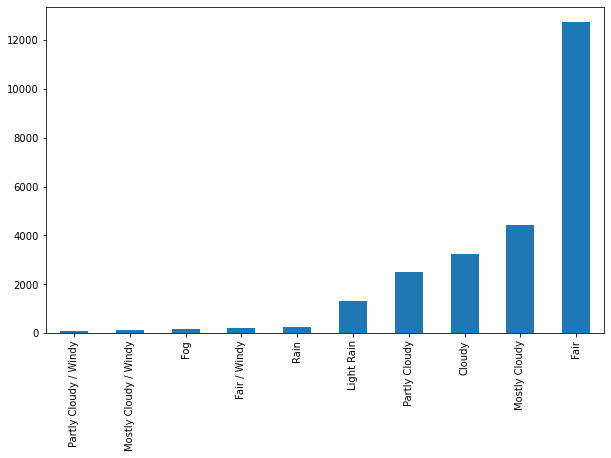

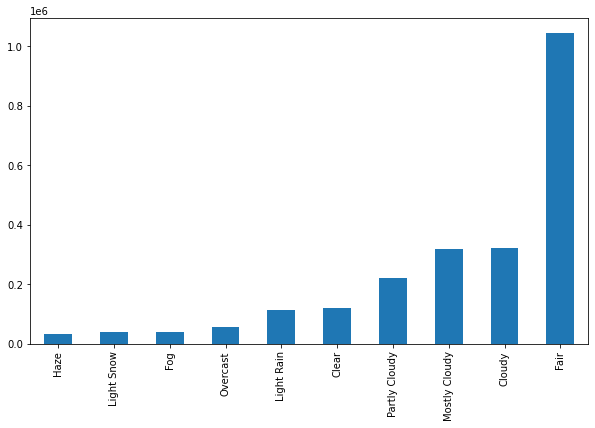

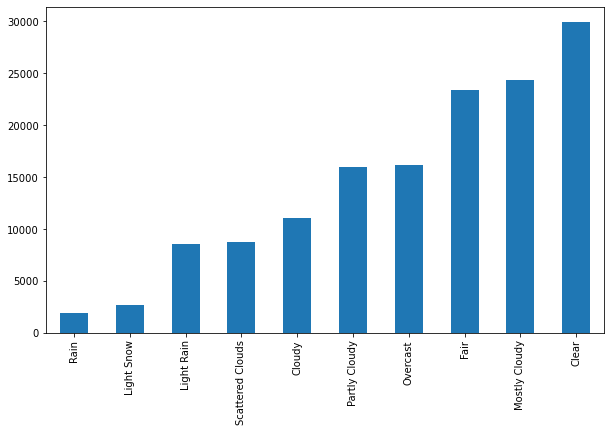

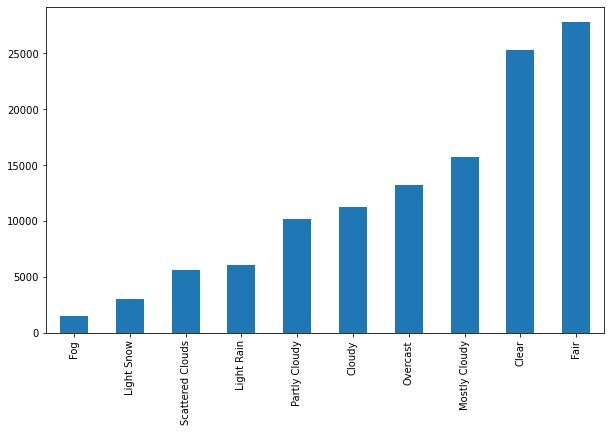

In [66]:
for x in range(1,5):
    plt.subplots(figsize=(10,6))
    df.loc[df["Severity"] == x]['Weather_Condition'].value_counts().sort_values()[-10:].plot(kind="bar")

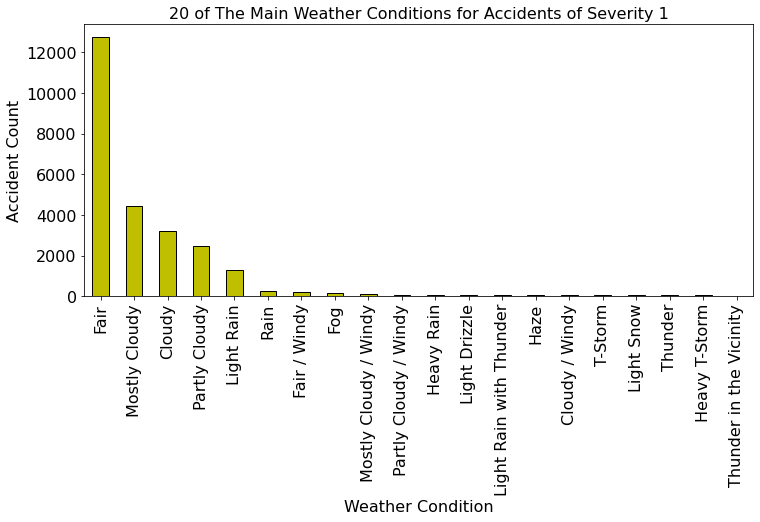

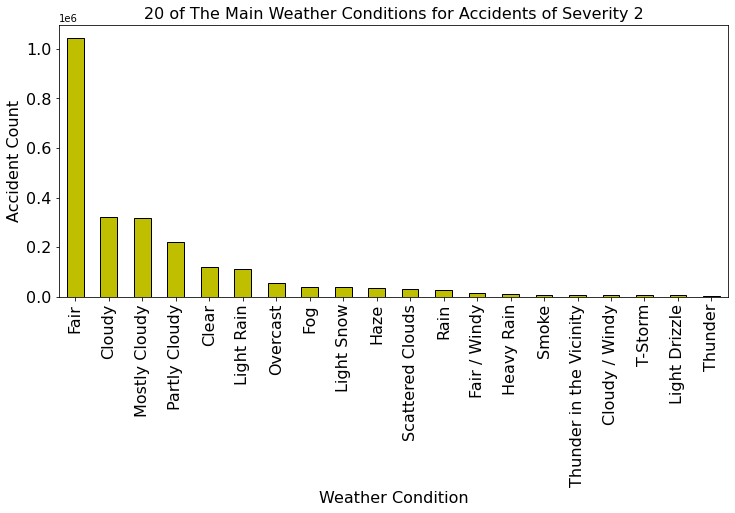

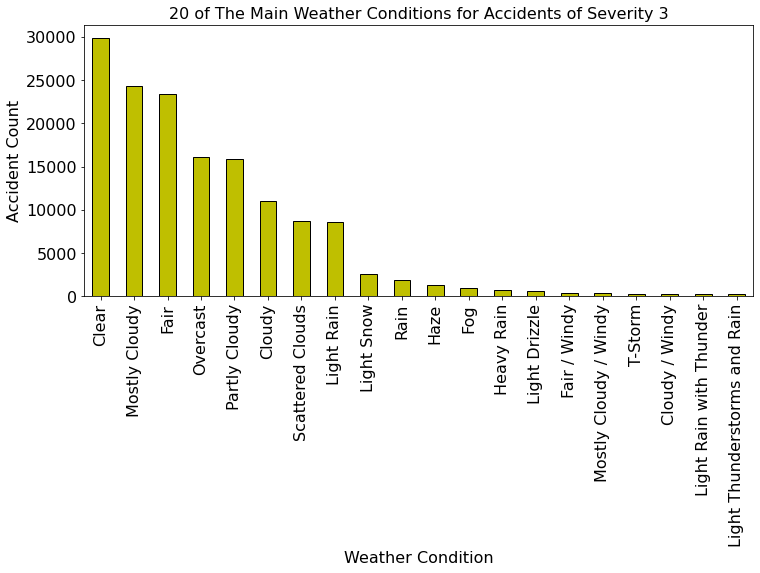

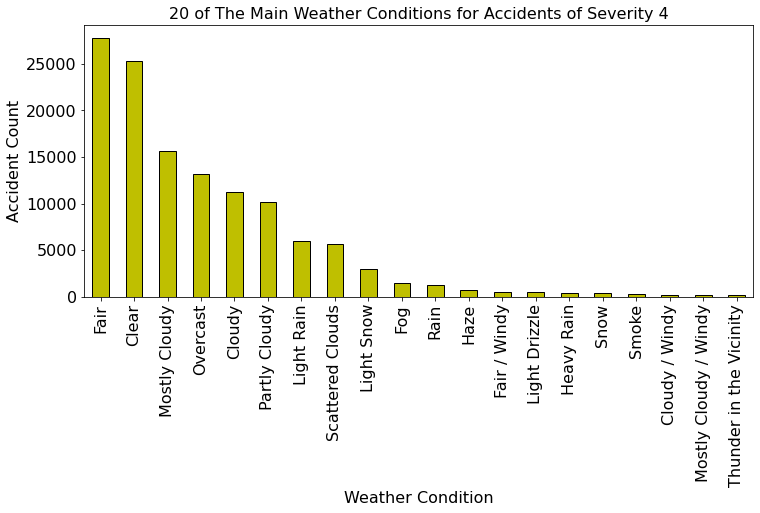

In [67]:
for x in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(x),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

In [ ]:
weather_cond=df["Temperature(F)"].value_counts()
weather_cond.sort_values().tail(10)

In [ ]:
plt.figure(figsize=(12,5))
plt.title(" Accident cases reported for different Temperatures",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Temperature(F)')
sns.scatterplot(y=weather_cond.index, x=weather_cond)

In [76]:
humidity_effect=df["Humidity(%)"].value_counts()
humidity_effect.sort_values().tail()

1.0    113507
2.0    363381
3.0    660523
4.0    807505
5.0    827334
Name: Humidity(%), dtype: int64

<AxesSubplot:title={'center':' Accident cases reported for different humidity '}, xlabel='No. of accidents', ylabel='Humidity(%) '>

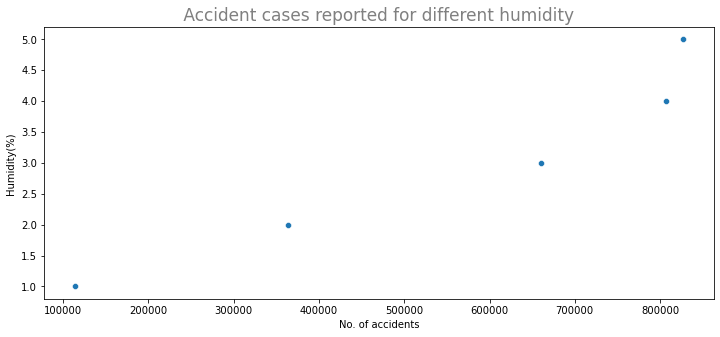

In [77]:
plt.figure(figsize=(12,5))
plt.title(" Accident cases reported for different humidity ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Humidity(%) ')
sns.scatterplot(y=humidity_effect.index, x=humidity_effect)

In [74]:
windspeed_effect=df["Wind_Speed(mph)"].value_counts()
windspeed_effect.sort_values().tail()

7.0    205667
6.0    222502
3.0    225664
5.0    231000
0.0    433636
Name: Wind_Speed(mph), dtype: int64

<AxesSubplot:title={'center':' Accident cases reported for different Windspeed '}, xlabel='No. of accidents', ylabel='Wind_Speed(mph)'>

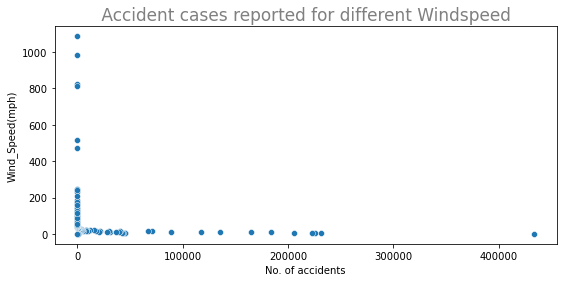

In [75]:
plt.figure(figsize=(9,4))
plt.title(" Accident cases reported for different Windspeed ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Wind_Speed(mph)')
sns.scatterplot(y=windspeed_effect.index, x=windspeed_effect)

In [72]:
pressure_effect=df["Pressure(in)"].value_counts()
pressure_effect.sort_values().tail()

30.03    41477
30.01    41736
29.99    42978
29.94    43165
29.96    43668
Name: Pressure(in), dtype: int64

<AxesSubplot:title={'center':' Accident cases reported for different pressures '}, xlabel='No. of accidents', ylabel='Pressure(in)'>

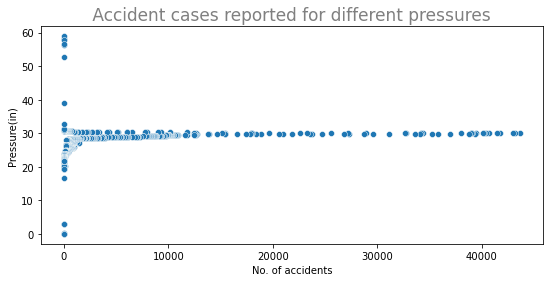

In [73]:
plt.figure(figsize=(9,4))
plt.title(" Accident cases reported for different pressures ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Pressure(in)')
sns.scatterplot(y=pressure_effect.index, x=pressure_effect)

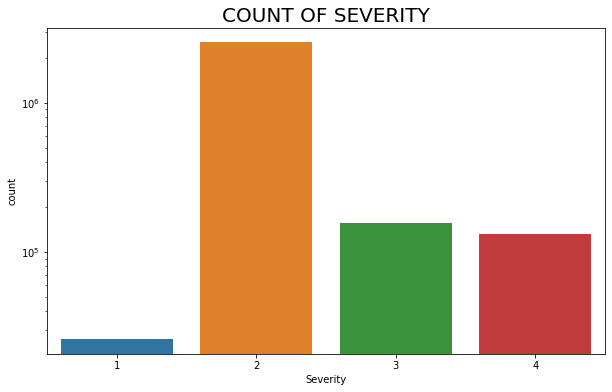

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(x="Severity",data=df)
plt.yscale("log")
plt.title("COUNT OF SEVERITY",fontsize=20)
plt.show()

In [69]:
weather_effect=df["Weather_Condition"].value_counts()
weather=weather_effect.head(10)
weather

Fair                1107194
Mostly Cloudy        363959
Cloudy               348767
Partly Cloudy        249939
Clear                173823
Light Rain           128403
Overcast              84882
Scattered Clouds      45132
Light Snow            43752
Fog                   41226
Name: Weather_Condition, dtype: int64

Text(0, 0.5, 'No. of accidents')

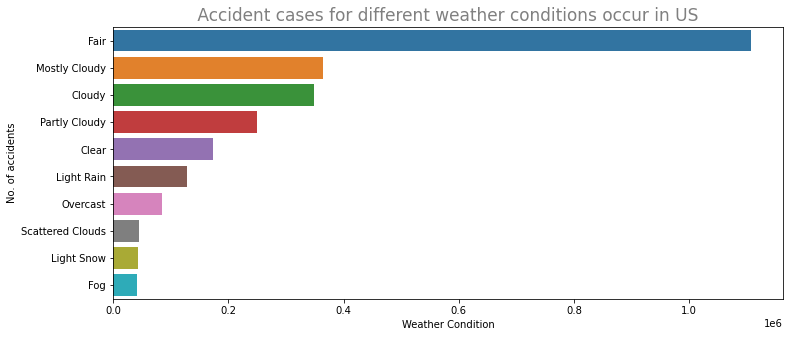

In [70]:
plt.figure(figsize=(12,5))
sns.barplot(x=weather, y=weather.index)
plt.title(" Accident cases for different weather conditions occur in US ",size=17,color="grey")
plt.xlabel('Weather Condition')
plt.ylabel('No. of accidents')

# Report

- This tells that majority of accidents have severity ~2 means not much higher impact on traffic.
- Miami(CITY) had most no of accident cases i.e 106966

- Top 5 Cities which had most number of cases are
    - Miami	    106966
    - Los Angeles	68956
    - Orlando	    54691
    - Dallas	    41979
    - Houston	    39448
- Cities which had least no of accidents are
    - Ridgedale	                    1
    - Sekiu	                        1
    - Wooldridge	                1
    - Bullock	                    1
    - American Fork-Pleasant Grove	1
- CA (STATE) had most no of accident cases i.e 795868

- Top 5 States of US which had most no accident cases are:
    - CA 795868
    - FL 401388
    - TX 149037
    - OR 126341
    - VA 113535
    
- US/Eastern timezone region reported the most number of accident cases.

- I-95 N street had max accident cases i.e 39853

- Most accident occurs between 2:00PM - 6:00PM

- most-deadliest accident hour is 5:00PM

- next highest accident occur between 6:00AM - 8:00AM

- friday had the highest no of accident cases i.e 492074.

- accident cases are less during weekends i.e satuday and sunday and evenly distributed during business days.

- Most no of cases are occured during December i.e 473943

- at the end of the year the number of accidents is quite high ie during december,november,october had most no of accidents

- year 2021 had max no of accidents i.e 1511745

- trend is increasing exponentially yearly .

- sharp rise after year 2020.

- maximum no of cases occured between temperature range: 50-80 F.

- maximum no of cases occured between humidity range: 80-100 %.

- as the humidity increases the no of cases also increases.

- Maximum cases occured for the wind speed range between 5(mph) - 10(mph)

- This is normal wind speed hence it is not the reason for accidents.

- max no of accident occured when the air pressureis between 20(in) to 30(in).

- 30(in) had max accidents

- Weather condition was Fair in most of the cases hence it is not a major cause behind the accidents.